<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




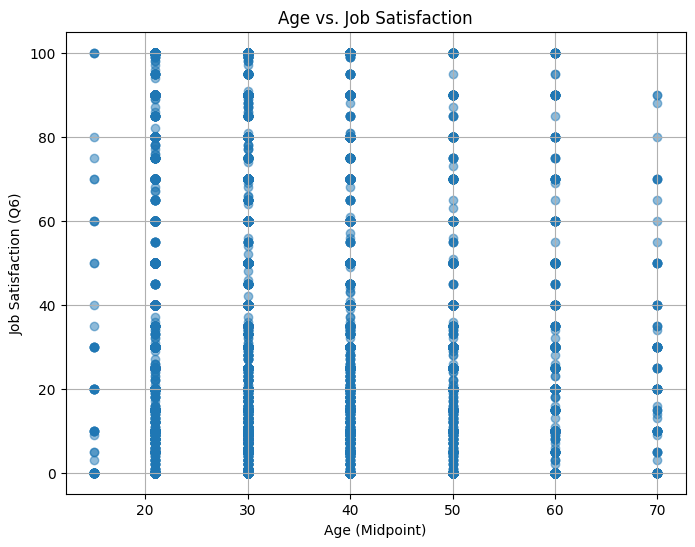

In [5]:
## Write your code here
# Map Age categories to numeric midpoints
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)
plt.figure(figsize=(8, 6))
plt.scatter(df['AgeNumeric'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Job Satisfaction (Q6)')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


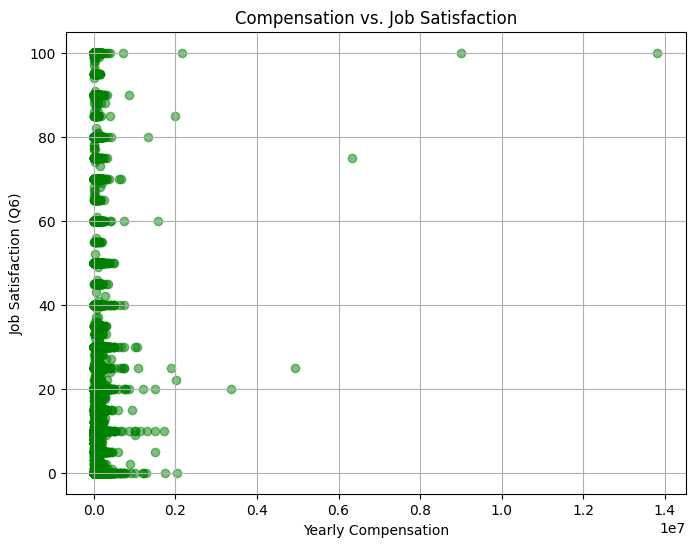

In [6]:
## Write your code here
plt.figure(figsize=(8, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5, color='green')
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Q6)')
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


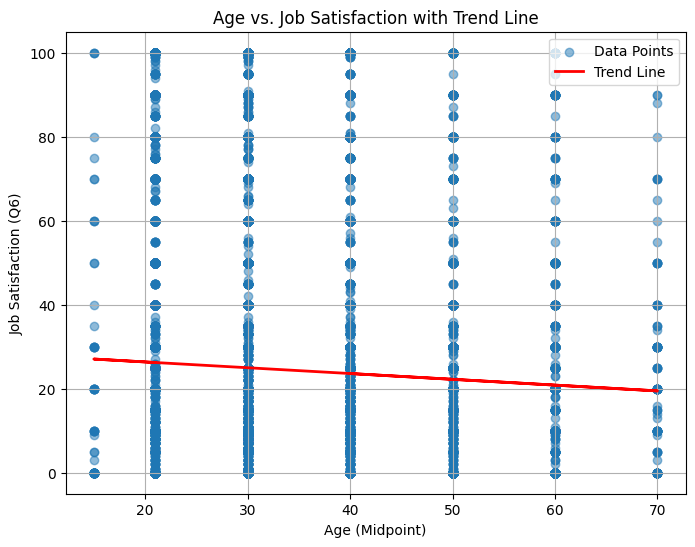

In [10]:
## Write your code here
# Map Age to numeric midpoints
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in both relevant columns
filtered_df = df[['AgeNumeric', 'JobSatPoints_6']].dropna()

# Extract x and y values
x = filtered_df['AgeNumeric']
y = filtered_df['JobSatPoints_6']

# Manual linear regression (least squares)
x_mean = x.mean()
y_mean = y.mean()
numerator = ((x - x_mean) * (y - y_mean)).sum()
denominator = ((x - x_mean) ** 2).sum()

slope = numerator / denominator
intercept = y_mean - slope * x_mean

# Generate predicted y values
y_pred = slope * x + intercept

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Trend Line')
plt.title('Age vs. Job Satisfaction with Trend Line')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Job Satisfaction (Q6)')
plt.grid(True)
plt.legend()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


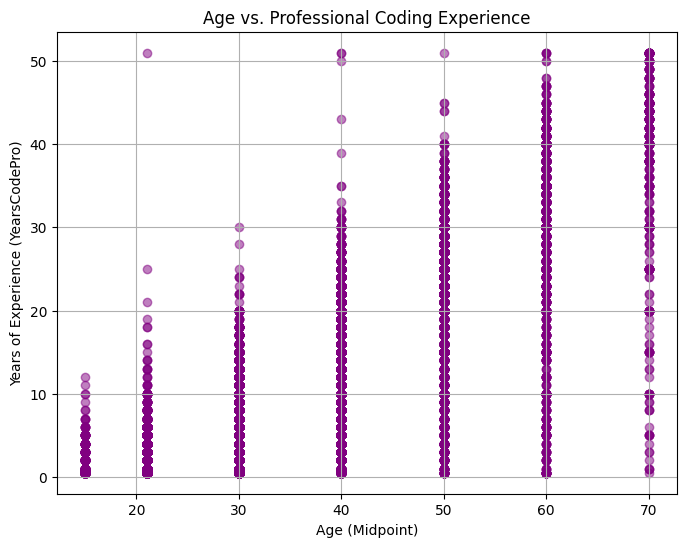

In [11]:
def convert_years_code_pro(value):
    if pd.isna(value):
        return None
    elif value == 'Less than 1 year':
        return 0.5
    elif value == 'More than 50 years':
        return 51
    else:
        try:
            return float(value)
        except ValueError:
            return None

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_years_code_pro)
# Drop missing values
filtered_df = df[['AgeNumeric', 'YearsCodeProNumeric']].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['AgeNumeric'], filtered_df['YearsCodeProNumeric'], alpha=0.5, color='purple')
plt.title('Age vs. Professional Coding Experience')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Years of Experience (YearsCodePro)')
plt.grid(True)
plt.show()



### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


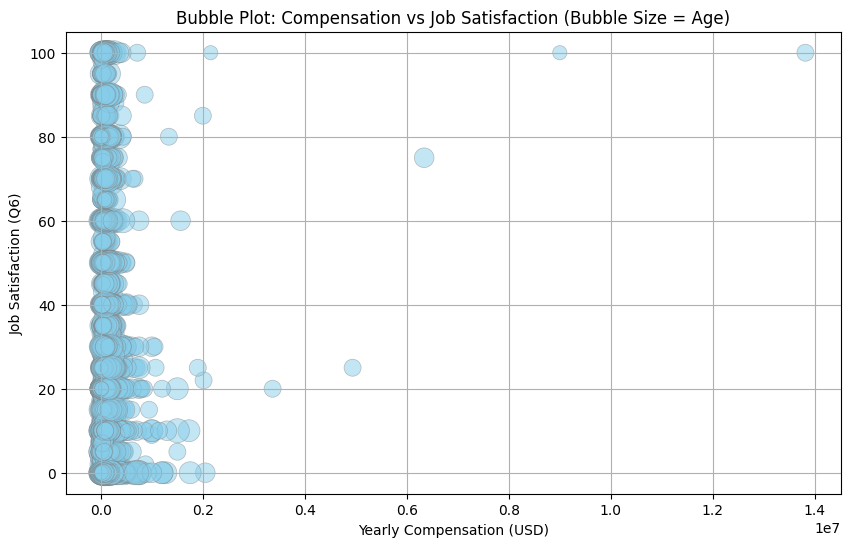

In [12]:
## Write your code here
# Drop rows with missing values
bubble_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_df['ConvertedCompYearly'],
    bubble_df['JobSatPoints_6'],
    s=bubble_df['AgeNumeric'] * 5,  # bubble size
    alpha=0.5,
    color='skyblue',
    edgecolors='gray',
    linewidth=0.5
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Q6)')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


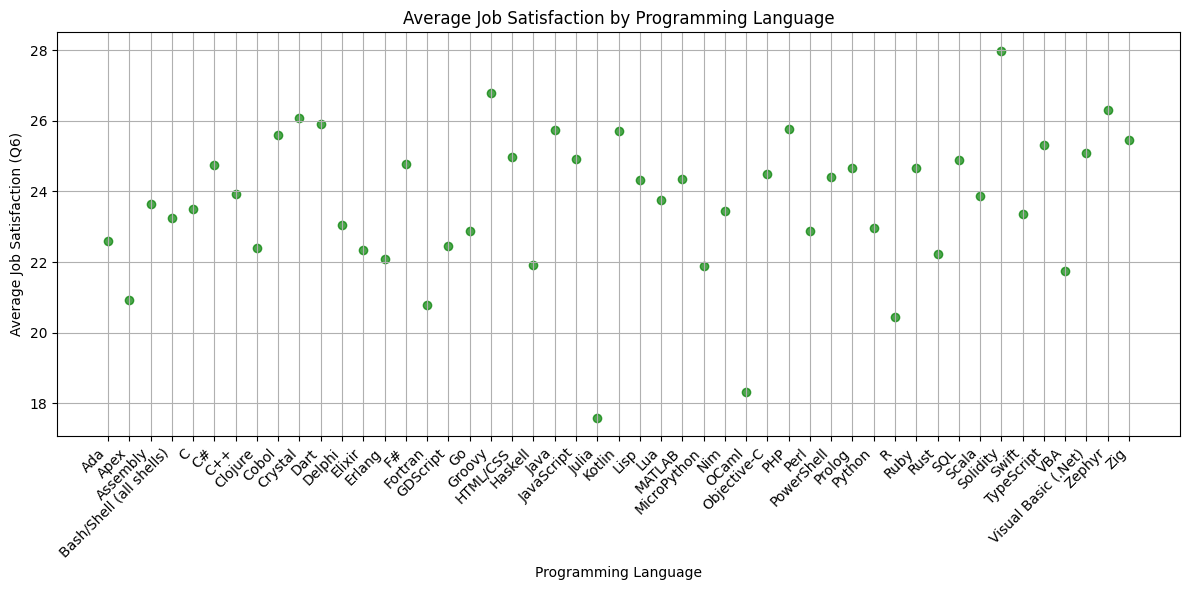

In [15]:
## Write your code here
# Expand LanguageHaveWorkedWith and calculate average Job Satisfaction per language
lang_data = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()
lang_rows = []

for _, row in lang_data.iterrows():
    langs = row['LanguageHaveWorkedWith'].split(';')
    for lang in langs:
        lang_rows.append((lang.strip(), row['JobSatPoints_6']))

lang_df = pd.DataFrame(lang_rows, columns=['Language', 'JobSatPoints_6'])

# Group by language and compute mean satisfaction
lang_avg = lang_df.groupby('Language')['JobSatPoints_6'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(lang_avg['Language'], lang_avg['JobSatPoints_6'], color='green', alpha=0.7)
plt.xticks(rotation=90)
plt.title('Average Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction (Q6)')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_1386/1798427648.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


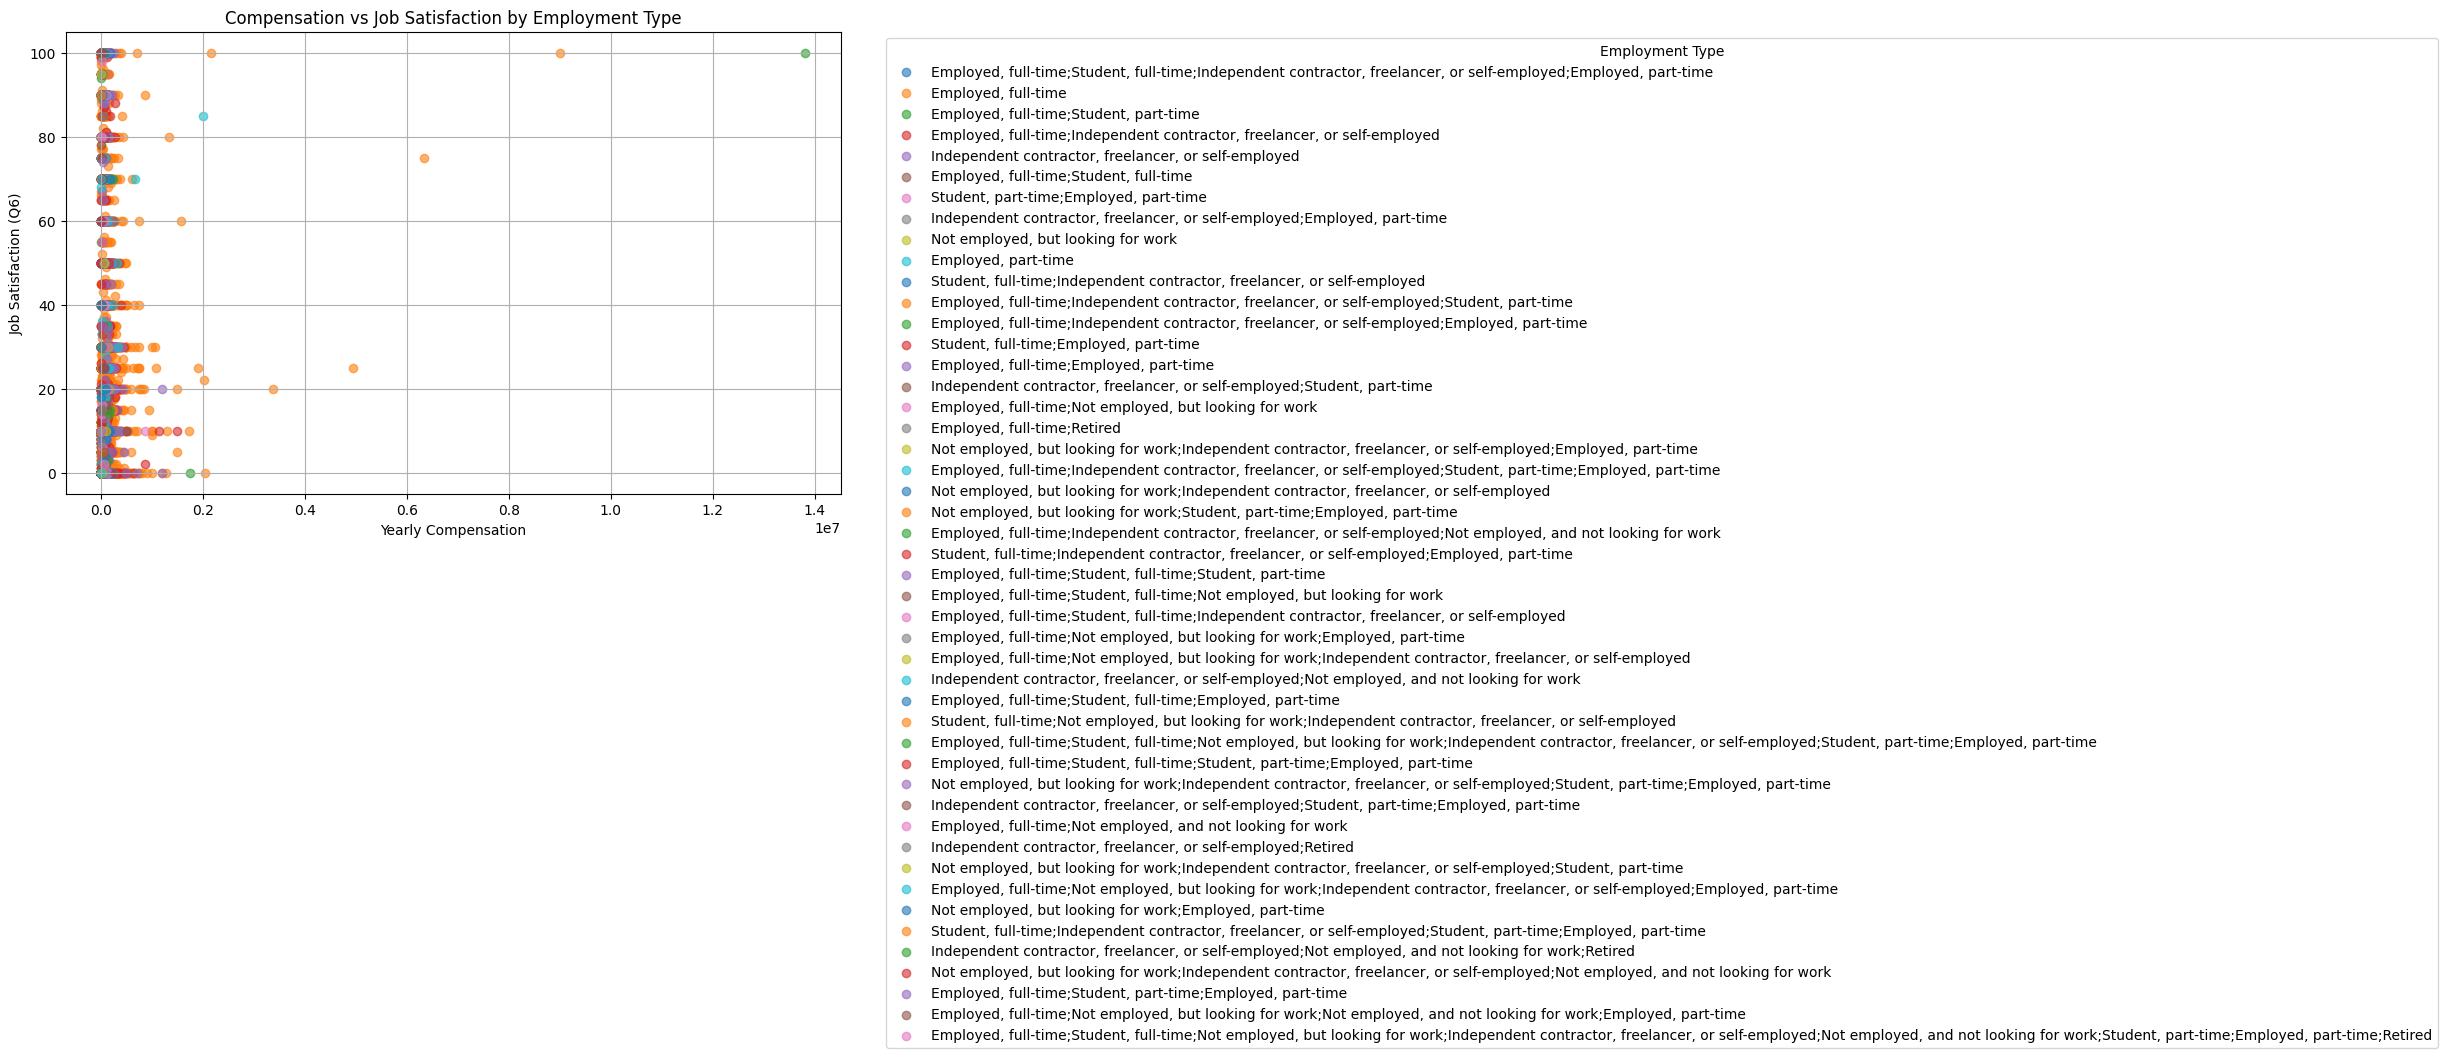

In [16]:
## Write your code here
# Filter and clean data
emp_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()

# Plot by Employment Type
plt.figure(figsize=(10, 6))
for emp_type in emp_df['Employment'].unique():
    sub = emp_df[emp_df['Employment'] == emp_type]
    plt.scatter(sub['ConvertedCompYearly'], sub['JobSatPoints_6'], label=emp_type, alpha=0.6)

plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Q6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


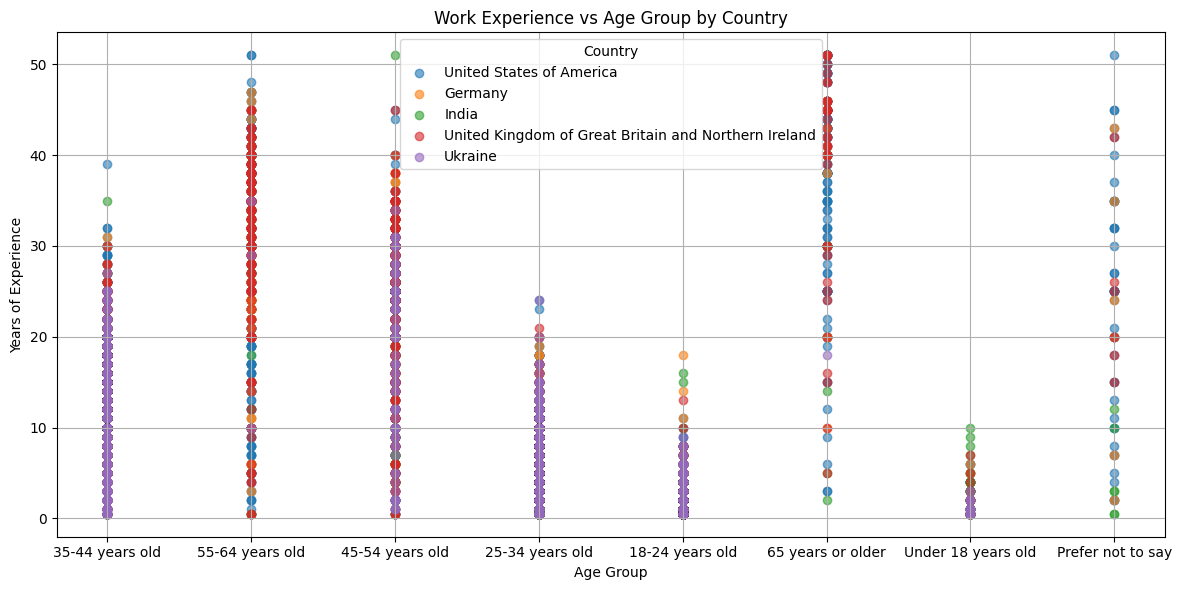

In [17]:
## Write your code here
# Convert YearsCodePro (if not done already)
df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_years_code_pro)

# Drop NaNs
exp_age_country = df[['YearsCodeProNumeric', 'Age', 'Country']].dropna()

# Plot by Country (limiting to top 5 countries for clarity)
top_countries = exp_age_country['Country'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
for country in top_countries:
    sub = exp_age_country[exp_age_country['Country'] == country]
    plt.scatter(sub['Age'], sub['YearsCodeProNumeric'], label=country, alpha=0.6)

plt.title('Work Experience vs Age Group by Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Experience')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
